In [3]:
from tkinter import Tk
from tkinter import filedialog as fd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functions import *

from datetime import datetime

In [4]:
messages = process_transcript_to_pandas()

In [27]:
hour_dict = {
        'hour': [],
        'number_of_messages': []
}

#12 i 13

for i in range(0, 24):
    hour_dict['hour'].append(str(i).rjust(2, '0'))
    hour_dict['number_of_messages'].append(0)

messages = messages.reset_index(drop=True)

for index, row in messages.iterrows():
    # print(row['timestamp'][12:14].rjust(2, '0'))
    hour_dict['number_of_messages'][hour_dict['hour'].index(row['timestamp'][12:14].rjust(2, '0'))] += 1

for i in range(len(hour_dict['hour'])):
    hour_dict['hour'][i] = str(int(hour_dict['hour'][i]) + 1)

{'hour': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], 'number_of_messages': [3174, 558, 17, 17, 3, 52, 182, 769, 308, 892, 757, 780, 1657, 2347, 1887, 1659, 1534, 1469, 1984, 3139, 3866, 4938, 3857, 4138]}


In [28]:
hours = pd.DataFrame(hour_dict)

hours = hours.set_index('hour')

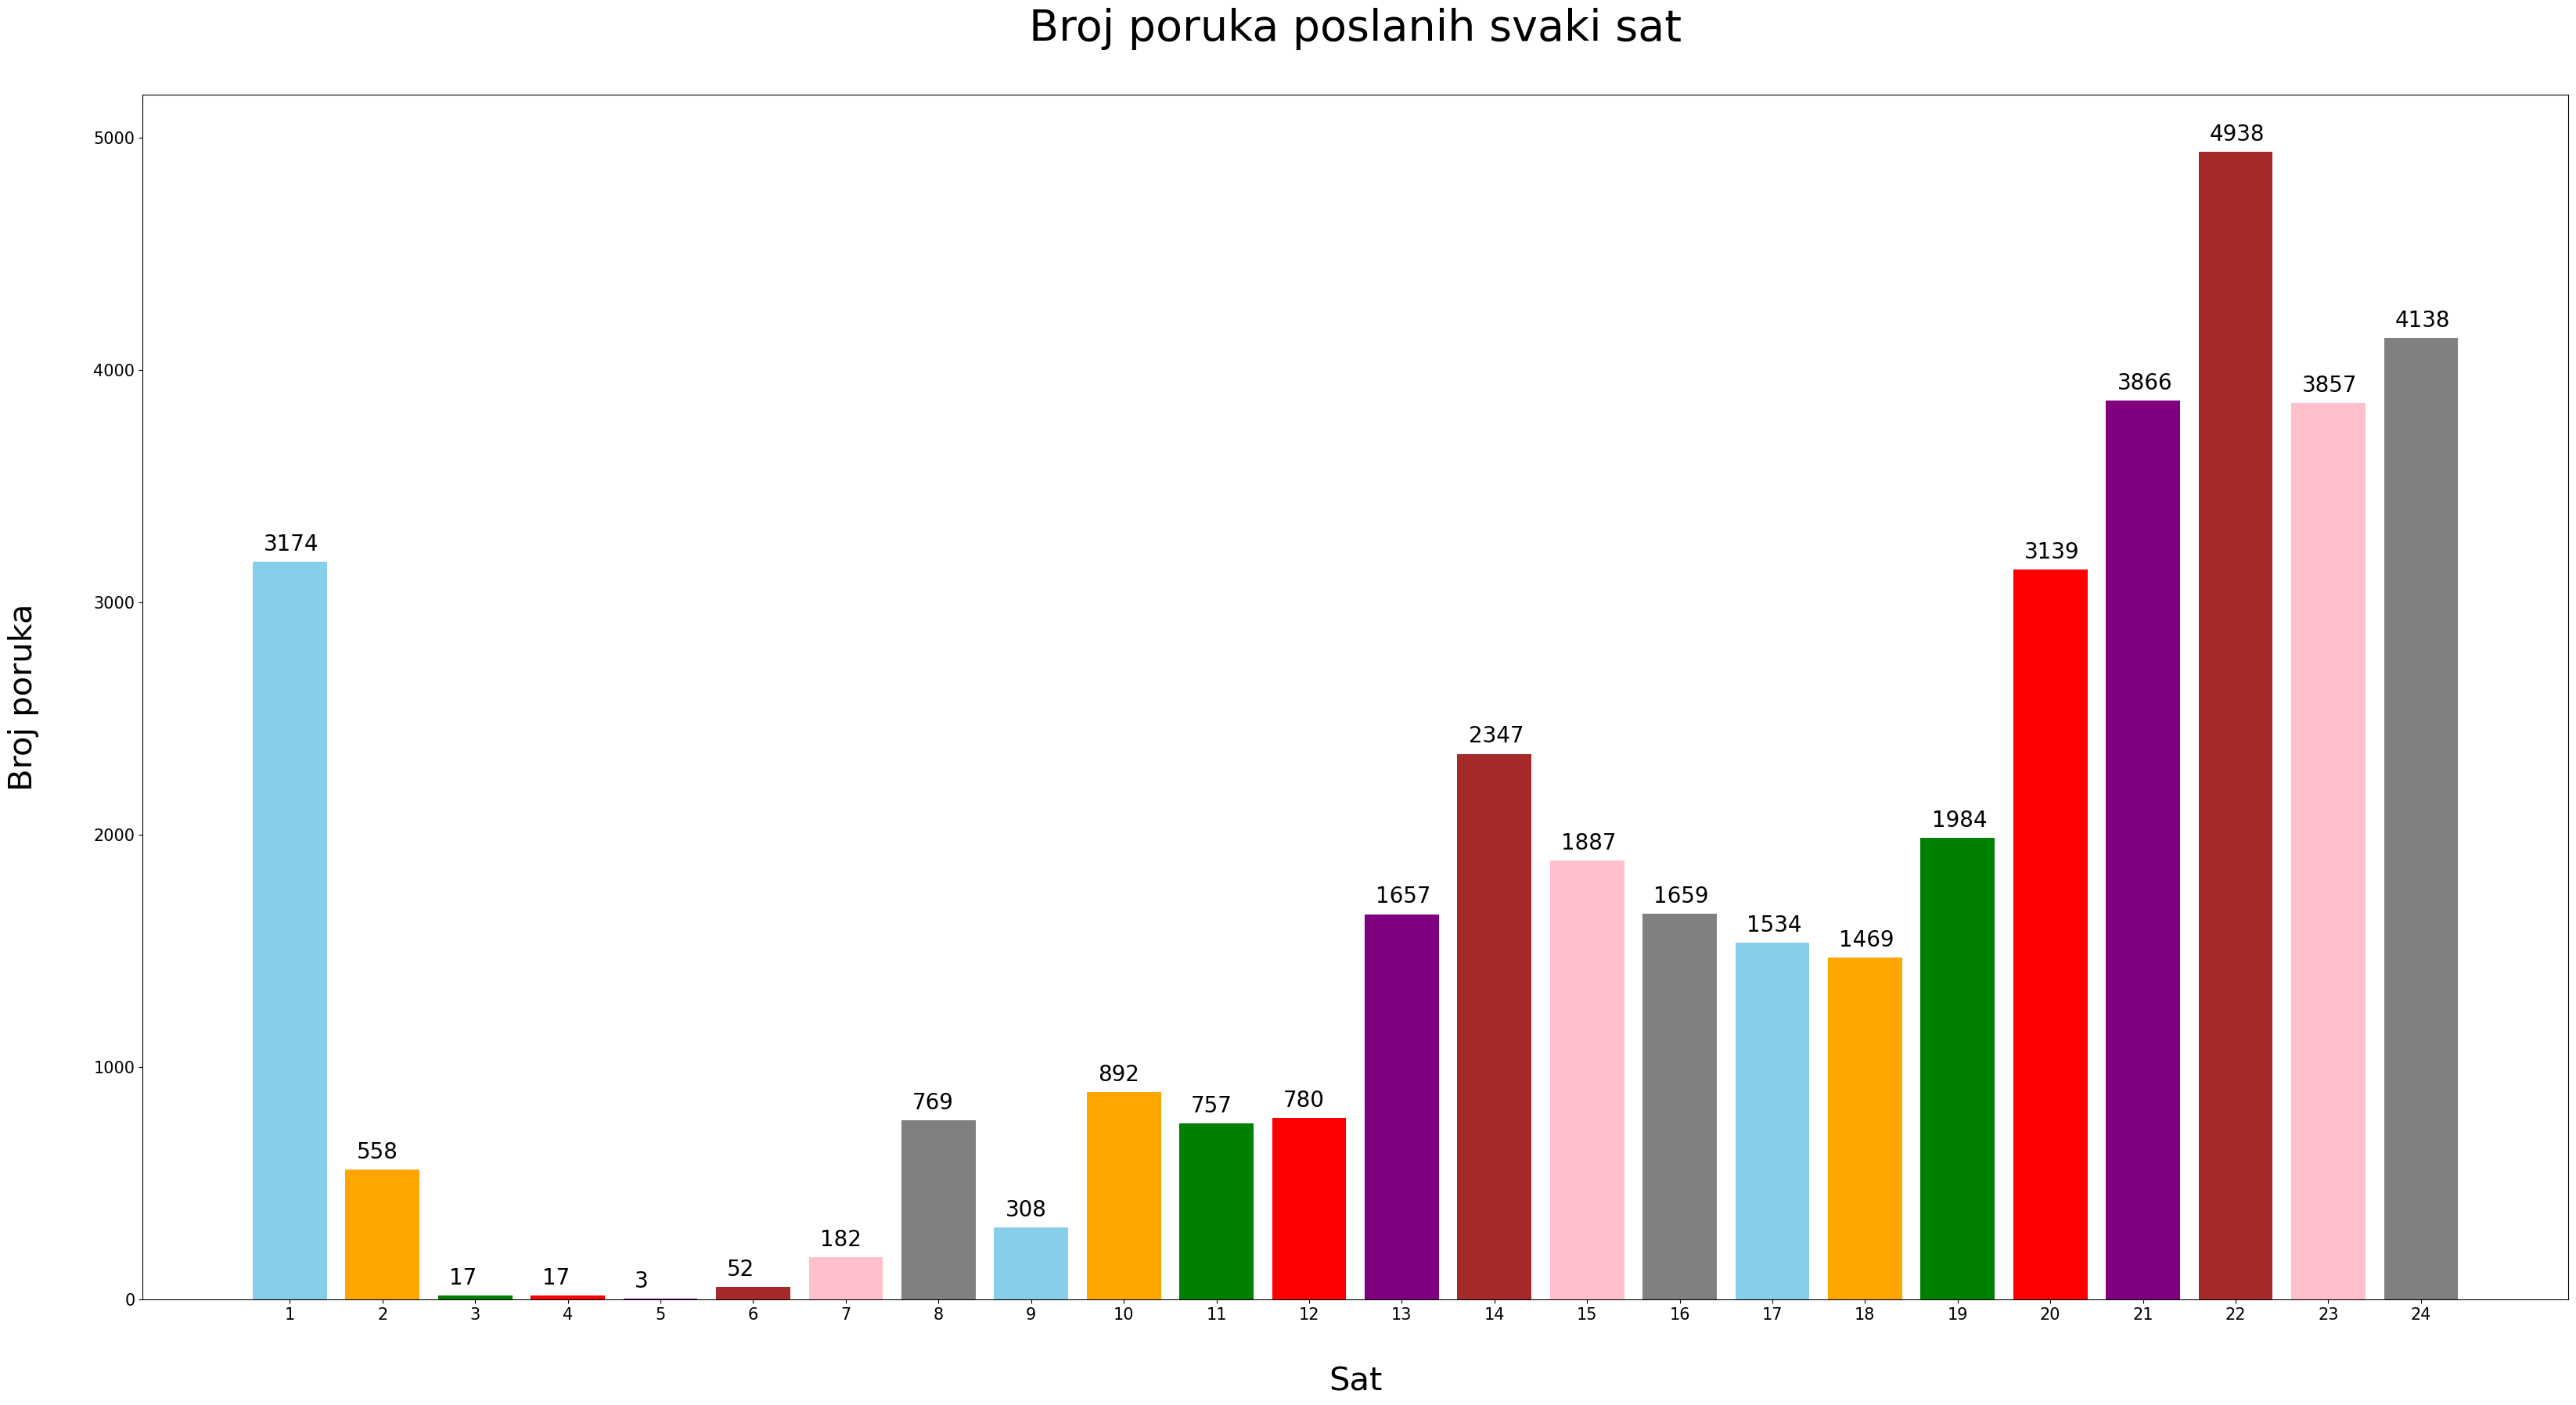

In [40]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(40, 20))
bars = plt.bar(hours.index, hours['number_of_messages'],  color=colors[:len(hours)])
plt.xlabel('Sat', fontsize=30, labelpad=40)  # Increase font size and set label padding for x-axis label
plt.ylabel('Broj poruka', fontsize=30, labelpad=50)  # Increase font size and set label padding for y-axis label
plt.title('Broj poruka poslanih svaki sat', fontsize=40, pad=50)  # Increase font size and set title padding

# Increase font size for x-axis and y-axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add value annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.28, bar.get_height() + 50, str(int(bar.get_height())),
             fontsize=20, color='black')

plt.show()